In [9]:
import os
import sys
import numpy as np
import torch
import torch.nn as nn

import argparse
import time
import pandas as pd

from easydict import EasyDict as edict
from tqdm import trange
from torchsummary import summary
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns

YOUR_PATH = "/home/jyt/workspace/fNIRS_models/code_data_tufts"
sys.path.insert(0, YOUR_PATH + '/fNIRS-mental-workload-classifiers/helpers')
import models
import brain_data
from utils import generic_GetTrainValTestSubjects, seed_everything, makedir_if_not_exist, plot_confusion_matrix, save_pickle, train_one_epoch, eval_model, save_training_curves_FixedTrainValSplit, write_performance_info_FixedTrainValSplit, write_program_time, write_inference_time
from utils import LabelSmoothing, train_one_epoch_fNIRS_T, eval_model_fNIRST, train_one_epoch_Ours_T, eval_model_OursT
from utils import EarlyStopping

paint the fNIRS data for a subject

In [24]:
YOUR_PATH="/home/jyt/workspace/fNIRS_models/code_data_tufts"
classification_task = 'binary'
data_dir = YOUR_PATH + "/fNIRS2MW/experiment/fNIRS_data/band_pass_filtered/slide_window_data/size_30sec_150ts_stride_03ts/"
subject = str(56)

In [22]:
num_chunk_this_window_size = 1488  # the window size 150 has 1488 chunks
    

if classification_task == 'four_class':
    data_loading_function = brain_data.read_subject_csv
    confusion_matrix_figure_labels = ['0back', '1back', '2back', '3back']
    
elif classification_task == 'binary':
    data_loading_function = brain_data.read_subject_csv_binary
    confusion_matrix_figure_labels = ['0back', '2back']
    
else:
    raise NameError('not supported classification type')

In [25]:
sub_feature, sub_label = data_loading_function(os.path.join(data_dir, 'sub_{}.csv'.format(subject)),  num_chunk_this_window_size=num_chunk_this_window_size)
sub_feature.shape

(744, 150, 8)

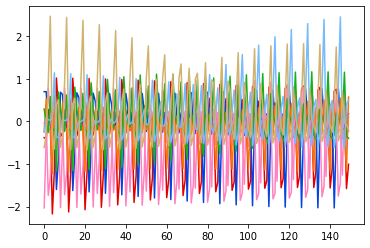

In [39]:
c=1
t=4
sub_feature_painting = sub_feature[t:t+c].reshape((8,-1))
plt.plot(np.arange(150*c),sub_feature_painting[0,:], color='xkcd:red')
plt.plot(np.arange(150*c),sub_feature_painting[1,:], color='xkcd:blue')
plt.plot(np.arange(150*c),sub_feature_painting[2,:], color='xkcd:pink')
plt.plot(np.arange(150*c),sub_feature_painting[3,:], color='xkcd:pink')
plt.plot(np.arange(150*c),sub_feature_painting[4,:], color='xkcd:orange')
plt.plot(np.arange(150*c),sub_feature_painting[5,:], color='xkcd:green')
plt.plot(np.arange(150*c),sub_feature_painting[6,:], color='xkcd:sky blue')
plt.plot(np.arange(150*c),sub_feature_painting[7,:], color='xkcd:tan')
plt.show()

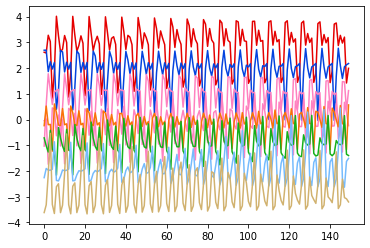

In [40]:
c=1
t=4
sub_feature_painting = sub_feature[t:t+c].reshape((8,-1))
plt.plot(np.arange(150*c),sub_feature_painting[0,:]+3, color='xkcd:red')
plt.plot(np.arange(150*c),sub_feature_painting[1,:]+2, color='xkcd:blue')
plt.plot(np.arange(150*c),sub_feature_painting[2,:]+1, color='xkcd:pink')
plt.plot(np.arange(150*c),sub_feature_painting[3,:], color='xkcd:pink')
plt.plot(np.arange(150*c),sub_feature_painting[4,:], color='xkcd:orange')
plt.plot(np.arange(150*c),sub_feature_painting[5,:]-1, color='xkcd:green')
plt.plot(np.arange(150*c),sub_feature_painting[6,:]-2, color='xkcd:sky blue')
plt.plot(np.arange(150*c),sub_feature_painting[7,:]-3, color='xkcd:tan')
plt.show()